GAME DATA FROM STEAM, WITH MANY VARIETY OF GAMES AND CONSOLE PLAYED AND USED, WHO DO YOU KNOW WHO IS THE MOST FAMOUS?

                                        FOLLOW THEIR DEVELOPMENT

IMPORT LIBRARY

In [29]:
from pathlib import Path
import re

import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

LOADING THE DATASET

In [30]:
df=pd.read_csv("data.csv")

EXPLORATORY DATA ANALYSIS (EDA)

In [31]:
df.head()

,Rank,Name,Unnamed: 2,Platform,Metascore,Date,Title,Unnamed: 7
0,1,The Legend of Zelda: Ocarina of Time,NaN,Nintendo 64,99,23-Nov-98,"As a young boy, Link is tricked by Ganondorf, ...",NaN
1,2,Tony Hawk's Pro Skater 2,NaN,PlayStation,98,20-Sep-00,As most major publishers' development efforts ...,NaN
2,3,Grand Theft Auto IV,NaN,PlayStation 3,98,29-Apr-08,[Metacritic's 2008 PS3 Game of the Year; Also ...,NaN
3,4,SoulCalibur,NaN,Dreamcast,98,8-Sep-99,"This is a tale of souls and swords, transcendi...",NaN
4,5,Grand Theft Auto IV,NaN,Xbox 360,98,29-Apr-08,[Metacritic's 2008 Xbox 360 Game of the Year; ...,NaN


In [32]:
df.tail()

,Rank,Name,Unnamed: 2,Platform,Metascore,Date,Title,Unnamed: 7
95,96,Sid Meier's Civilization II,NaN,PC,94,29-Feb-96,An empire-building turn-based strategy game. T...,NaN
96,97,Quake,NaN,PC,94,22-Jun-96,Rage through 32 single player levels and 6 dea...,NaN
97,98,Call of Duty 4: Modern Warfare,NaN,Xbox 360,94,5-Nov-07,As Call of Duty 4: Modern Warfare's single pla...,NaN
98,99,BioShock Infinite,NaN,PC,94,25-Mar-13,Initially conceived as a floating symbol of Am...,NaN
99,100,Halo 3,NaN,Xbox 360,94,25-Sep-07,Halo 3 is the third game in the Halo Trilogy a...,NaN


In [33]:
##CHECKING THE SHAPE OF THE DATASET
df.shape

(100, 8)

In [34]:
##CHECKING THE COLUMNS NAMES
col = df.columns
col

Index(['Rank', 'Name', 'Unnamed: 2', 'Platform', 'Metascore', 'Date', 'Title',
       'Unnamed: 7'],
      dtype='object')

In [35]:
df.describe(include='all')

,Rank,Name,Unnamed: 2,Platform,Metascore,Date,Title,Unnamed: 7
count,100.000000,100,0.0,100,100.000000,100,100,0.0
unique,NaN,72,NaN,18,NaN,85,89,NaN
top,NaN,Grand Theft Auto V,NaN,PC,NaN,21-Oct-22,Prepare for an all-new RPG experience in Perso...,NaN
freq,NaN,5,NaN,15,NaN,3,3,NaN
mean,50.500000,NaN,NaN,NaN,95.480000,NaN,NaN,NaN
std,29.011492,NaN,NaN,NaN,1.251101,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,94.000000,NaN,NaN,NaN
25%,25.750000,NaN,NaN,NaN,94.000000,NaN,NaN,NaN
50%,50.500000,NaN,NaN,NaN,95.000000,NaN,NaN,NaN
75%,75.250000,NaN,NaN,NaN,96.000000,NaN,NaN,NaN


In [36]:
df.dtypes

Rank            int64
Name           object
Unnamed: 2    float64
Platform       object
Metascore       int64
Date           object
Title          object
Unnamed: 7    float64
dtype: object

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        100 non-null    int64  
 1   Name        100 non-null    object 
 2   Unnamed: 2  0 non-null      float64
 3   Platform    100 non-null    object 
 4   Metascore   100 non-null    int64  
 5   Date        100 non-null    object 
 6   Title       100 non-null    object 
 7   Unnamed: 7  0 non-null      float64
dtypes: float64(2), int64(2), object(4)
memory usage: 6.4+ KB


In [38]:
df.nunique()

Rank          100
Name           72
Unnamed: 2      0
Platform       18
Metascore       6
Date           85
Title          89
Unnamed: 7      0
dtype: int64

In [39]:
##CHECKING DUPLICATE
df.duplicated().sum()

0

In [40]:
##CHECKING MISSING VALUES
df.isna().sum()

Rank            0
Name            0
Unnamed: 2    100
Platform        0
Metascore       0
Date            0
Title           0
Unnamed: 7    100
dtype: int64

In [41]:
df.dropna().shape

(0, 8)

In [42]:
#DELETE COLUMN
df = df.drop('Unnamed: 2', axis=1)

In [43]:
#DELETE COLUMN
df = df.drop('Unnamed: 7', axis=1)

In [44]:
#CHECKING COLUMN AFTER DELETE
df.columns

Index(['Rank', 'Name', 'Platform', 'Metascore', 'Date', 'Title'], dtype='object')

In [45]:
df.describe(include='all')

,Rank,Name,Platform,Metascore,Date,Title
count,100.000000,100,100,100.000000,100,100
unique,NaN,72,18,NaN,85,89
top,NaN,Grand Theft Auto V,PC,NaN,21-Oct-22,Prepare for an all-new RPG experience in Perso...
freq,NaN,5,15,NaN,3,3
mean,50.500000,NaN,NaN,95.480000,NaN,NaN
std,29.011492,NaN,NaN,1.251101,NaN,NaN
min,1.000000,NaN,NaN,94.000000,NaN,NaN
25%,25.750000,NaN,NaN,94.000000,NaN,NaN
50%,50.500000,NaN,NaN,95.000000,NaN,NaN
75%,75.250000,NaN,NaN,96.000000,NaN,NaN


In [46]:
#CHECKING THE DTYPES AFTER REMOVE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rank       100 non-null    int64 
 1   Name       100 non-null    object
 2   Platform   100 non-null    object
 3   Metascore  100 non-null    int64 
 4   Date       100 non-null    object
 5   Title      100 non-null    object
dtypes: int64(2), object(4)
memory usage: 4.8+ KB


In [47]:
# CONVERT TYPE
df["Date"] = df["Date"].astype(str)

In [48]:
#STATISTICAL SUMMARY OF THE DATASET
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,100.0,50.50,29.011492,1.0,25.75,50.5,75.25,100.0
Metascore,100.0,95.48,1.251101,94.0,94.00,95.0,96.00,99.0


PROCESS TO VISUALIZE

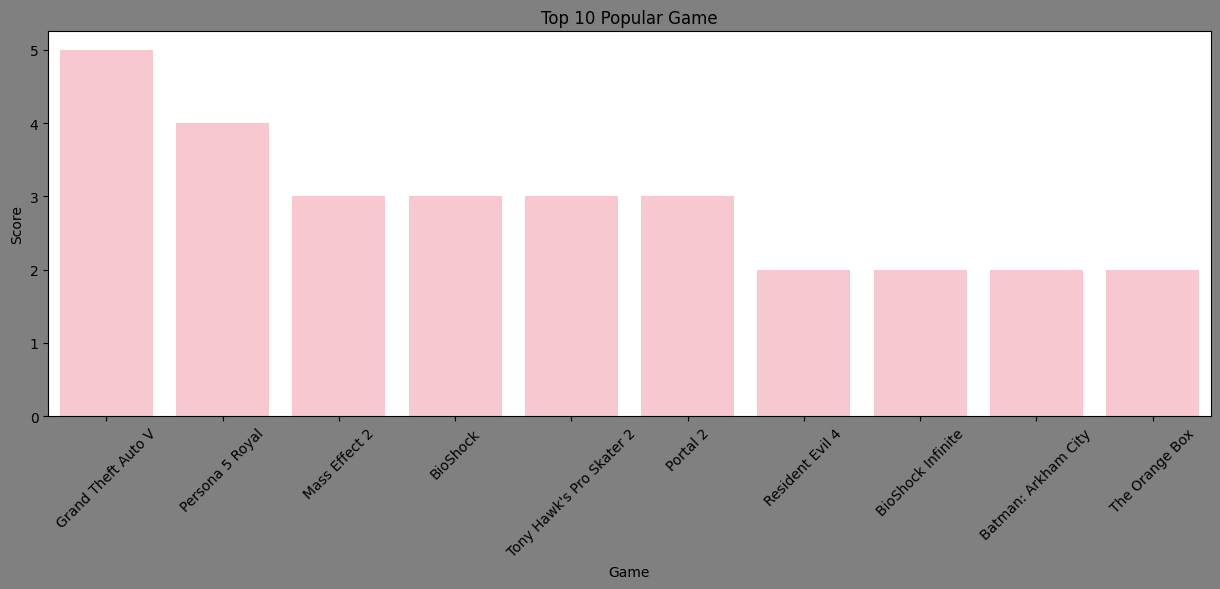

In [55]:
Count_Name = df['Name'].value_counts().head(10)
plt.figure(figsize=(15, 5), facecolor='grey')
sns.barplot(x=Count_Name.index, y=Count_Name, color='pink')
plt.title('Top 10 Popular Game')
plt.xlabel('Game')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

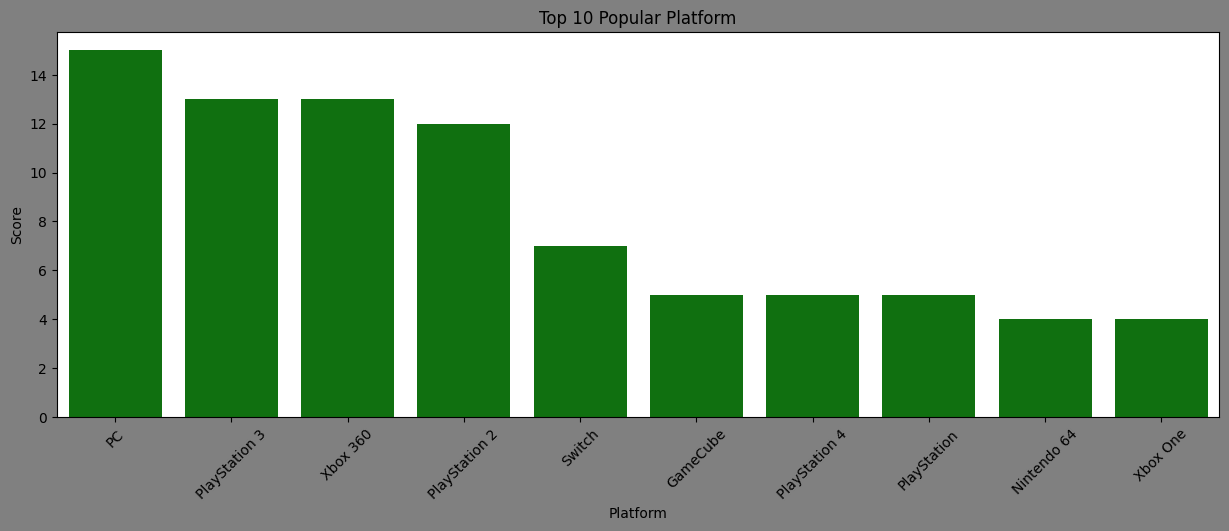

In [56]:
Count_Name = df['Platform'].value_counts().head(10)
plt.figure(figsize=(15, 5), facecolor='grey')
sns.barplot(x=Count_Name.index, y=Count_Name, color='green')
plt.title('Top 10 Popular Platform')
plt.xlabel('Platform')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

In [51]:
df['Years']=pd.DatetimeIndex(df['Date']).year

In [52]:
df_counts = df['Years'].value_counts().reset_index()
df_counts.columns = ['Years', 'Count']

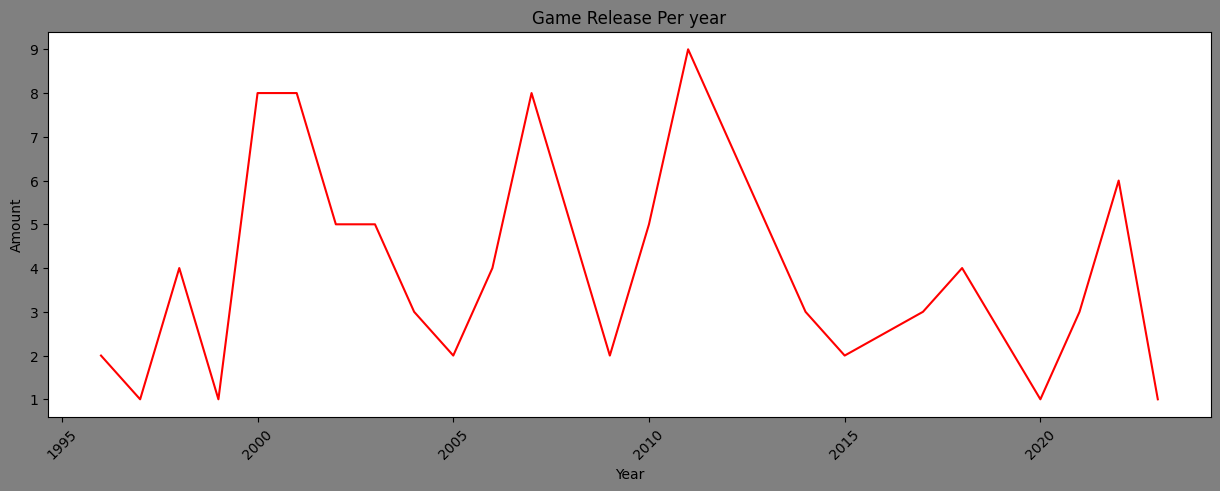

In [53]:
game_by_year = df['Years'].value_counts().sort_index()
plt.figure(figsize=(15, 5), facecolor='grey')
sns.lineplot(x=game_by_year.index, y=game_by_year.values, color='red')
plt.title('Game Release Per year')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.show()

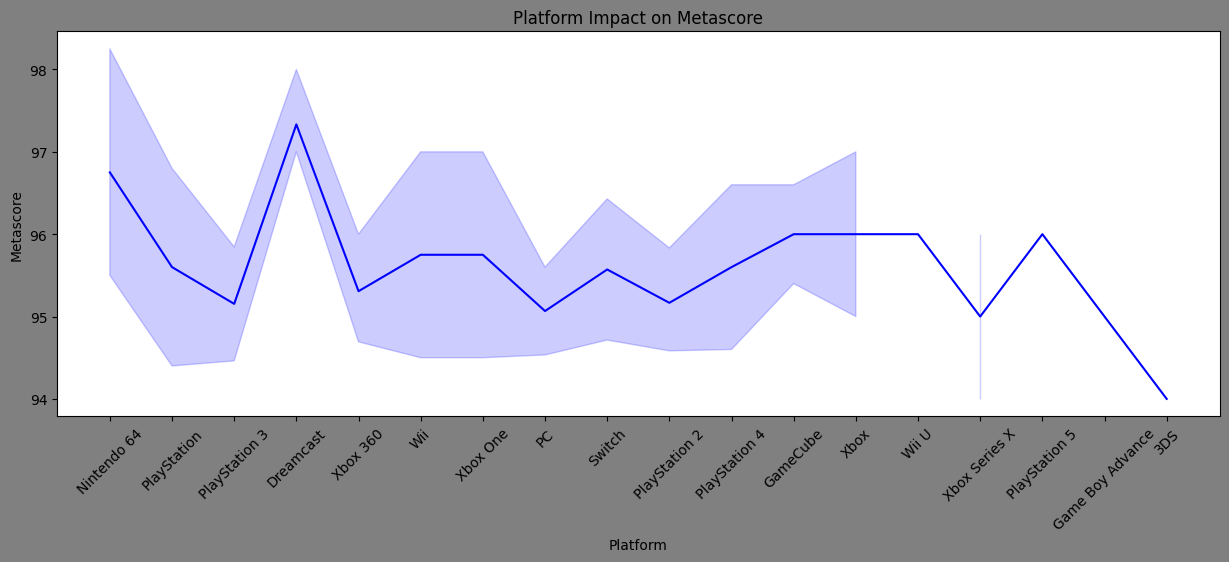

In [54]:
plt.figure(figsize=(15, 5), facecolor='grey')
sns.lineplot(data=df, x='Platform', y='Metascore', color='blue')
plt.title('Platform Impact on Metascore')
plt.xlabel('Platform')
plt.ylabel('Metascore')
plt.xticks(rotation=45)  
plt.show()